In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
import pydotplus

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import zscore, boxcox
import warnings
warnings.filterwarnings('ignore')

### Read And Display The Data

In [3]:
df = pd.read_csv("D:\Emerging India Notes\ibm-hr-analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
#pd.set_option('display.max_columns', None)
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lab_enc = LabelEncoder()

In [6]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [7]:
#var_cat = var_cat.columns.tolist()
var_cat = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

var_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
for i in var_cat:
    df[i] = lab_enc.fit_transform(df[i])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df1 = lab_enc.fit_transform(df['BusinessTravel'])

In [10]:
pd.Series(df1)

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Length: 1470, dtype: int64

In [11]:
df['BusinessTravel'] = df1

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Eliminate columns that only have one data level

In [13]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

In [14]:
df.shape

(1470, 32)

In [15]:
temp

['EmployeeCount', 'Over18', 'StandardHours']

In [16]:
df.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

<AxesSubplot:>

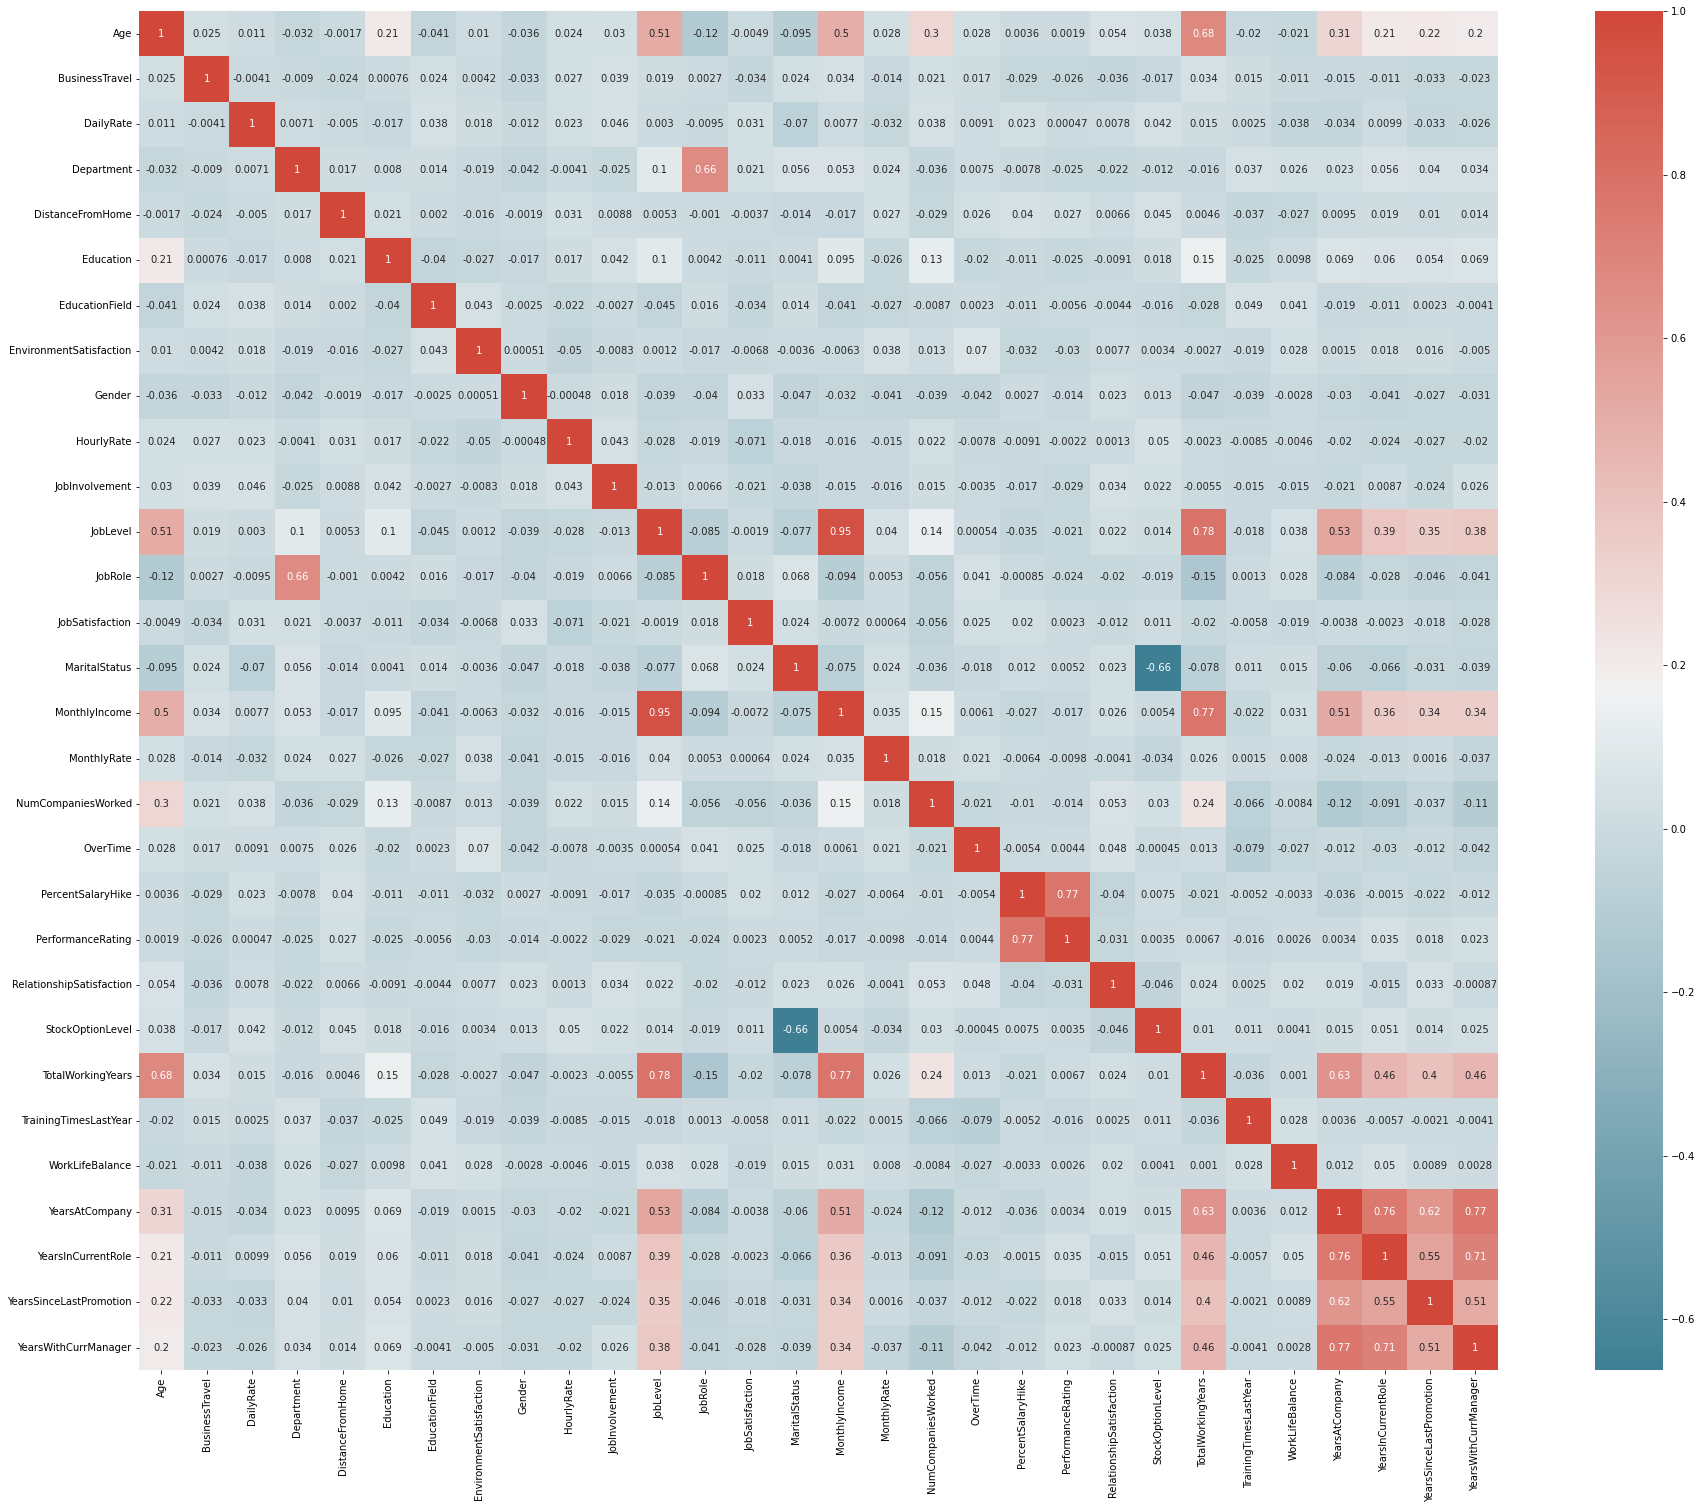

In [19]:
f, ax = plt.subplots(figsize=(35,25))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 15, as_cmap=True),
            square=True, ax=ax, annot = True)

From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. 
We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.

In [20]:
df.drop(['DailyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [21]:
df['OverTime'] = df.OverTime == 'Yes'

In [22]:
df['Attrition'] = df.Attrition == 'Yes'

### Exploratory Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

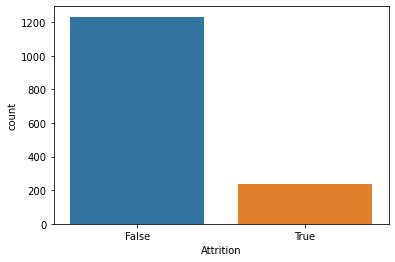

In [23]:
sns.countplot(x='Attrition', data=df)

This section is providing a general idea about attrition in the data set by looking at gender, marital status and department.

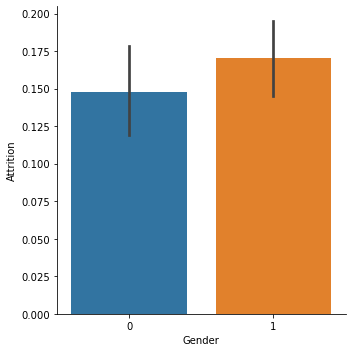

In [24]:
sns.factorplot(x = 'Gender', y='Attrition', kind = 'bar', data=df)

Male is generally more likely to quit than female.

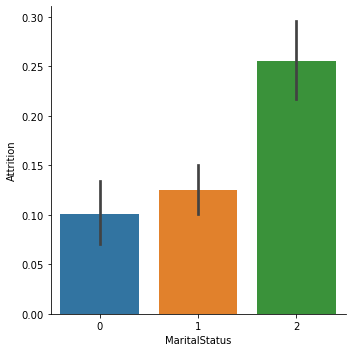

In [25]:
sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

Single people are more likely to quit compared to married and divorced people.

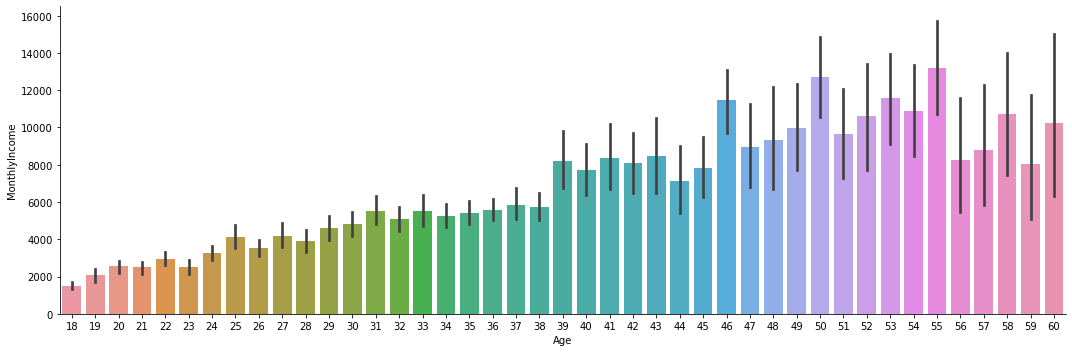

In [26]:
# We Check the monthly income by age in the age
sns.factorplot(x = 'Age', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3)

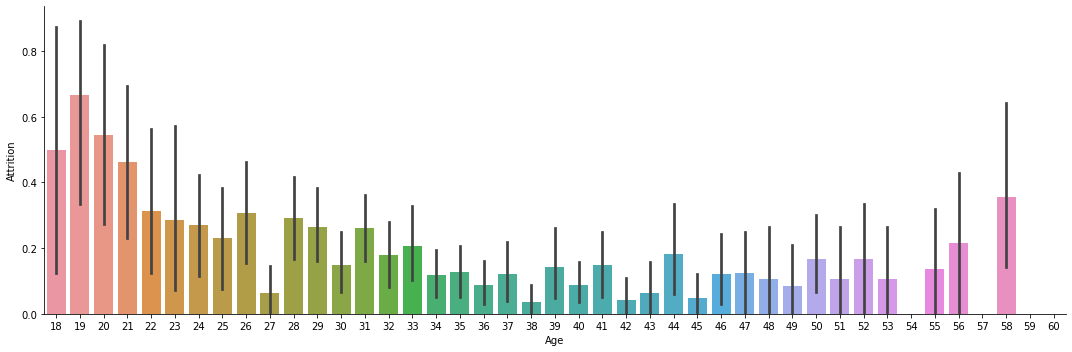

In [27]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

Younger people are having higher attrition rate compared to older people.

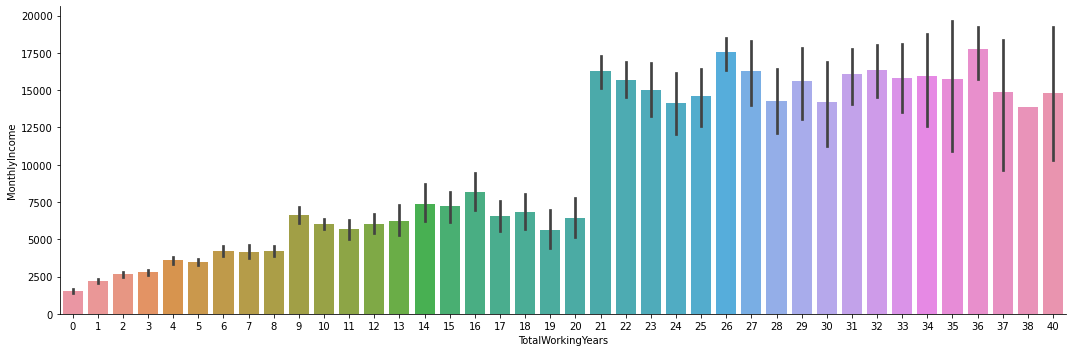

In [28]:
sns.factorplot(x = 'TotalWorkingYears', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3)

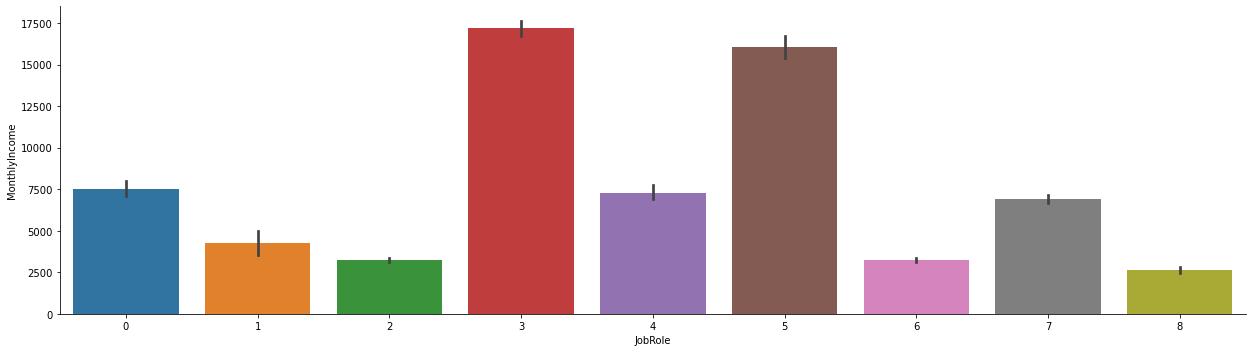

In [29]:
sns.factorplot(x = 'JobRole', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3.5)

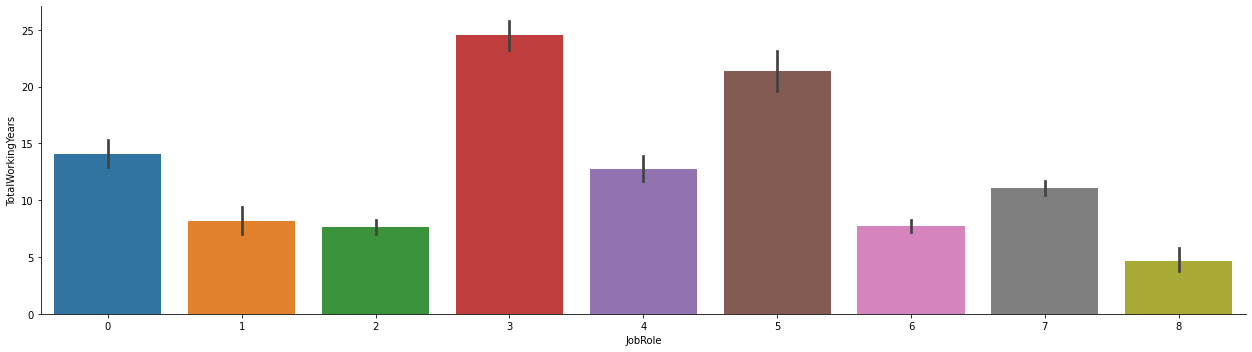

In [30]:
sns.factorplot(x = 'JobRole', y='TotalWorkingYears', kind = 'bar', data=df, aspect = 3.5)

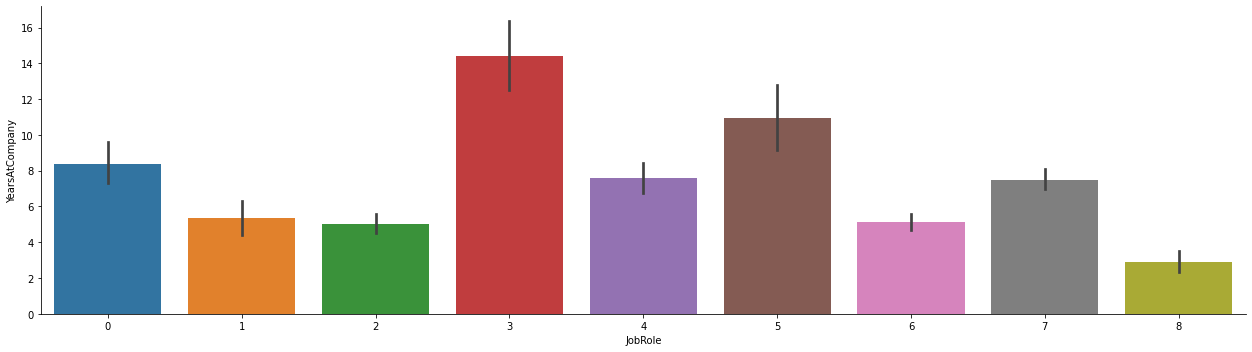

In [31]:
sns.factorplot(x = 'JobRole', y='YearsAtCompany', kind = 'bar', data=df, aspect = 3.5)

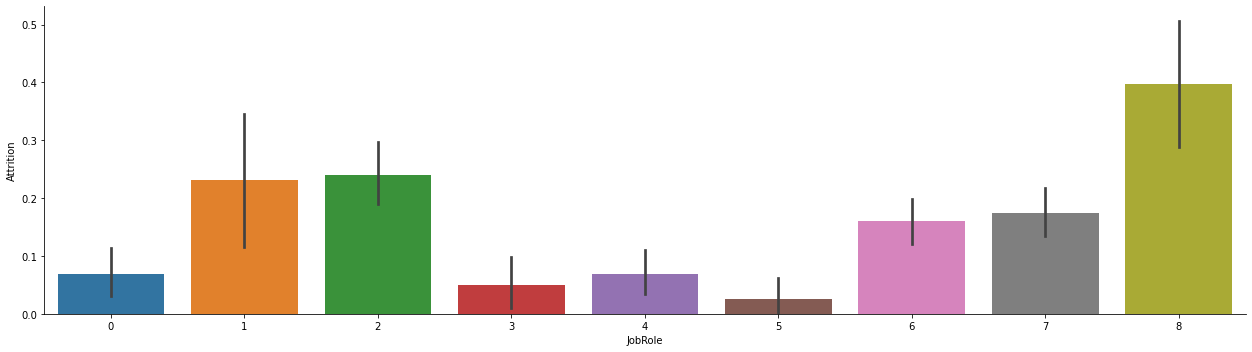

In [32]:
sns.factorplot(x = 'JobRole', y="Attrition", kind = 'bar', data=df, aspect = 3.5)

Data Transformation and derivation of new attributes if necessary

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [34]:
data = df.copy()

In [35]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

Create dummies and interaction terms

In [36]:
data.describe()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.665455,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [37]:
data.dtypes

Age                         int64
Attrition                    bool
BusinessTravel              int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                     bool
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [38]:
data=data.drop(['BusinessTravel','JobRole'],axis=1)

In [39]:
data=data.drop(['Department','EducationField','MaritalStatus'],axis=1)

In [40]:
data['Attrition'] = data['Attrition'].astype('int')
data['Gender'] = data['Gender'].astype('int')
data['OverTime'] = data['OverTime'].astype('int')

In [41]:
data.dtypes

Age                         int64
Attrition                   int32
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [42]:
data.shape

(1470, 24)

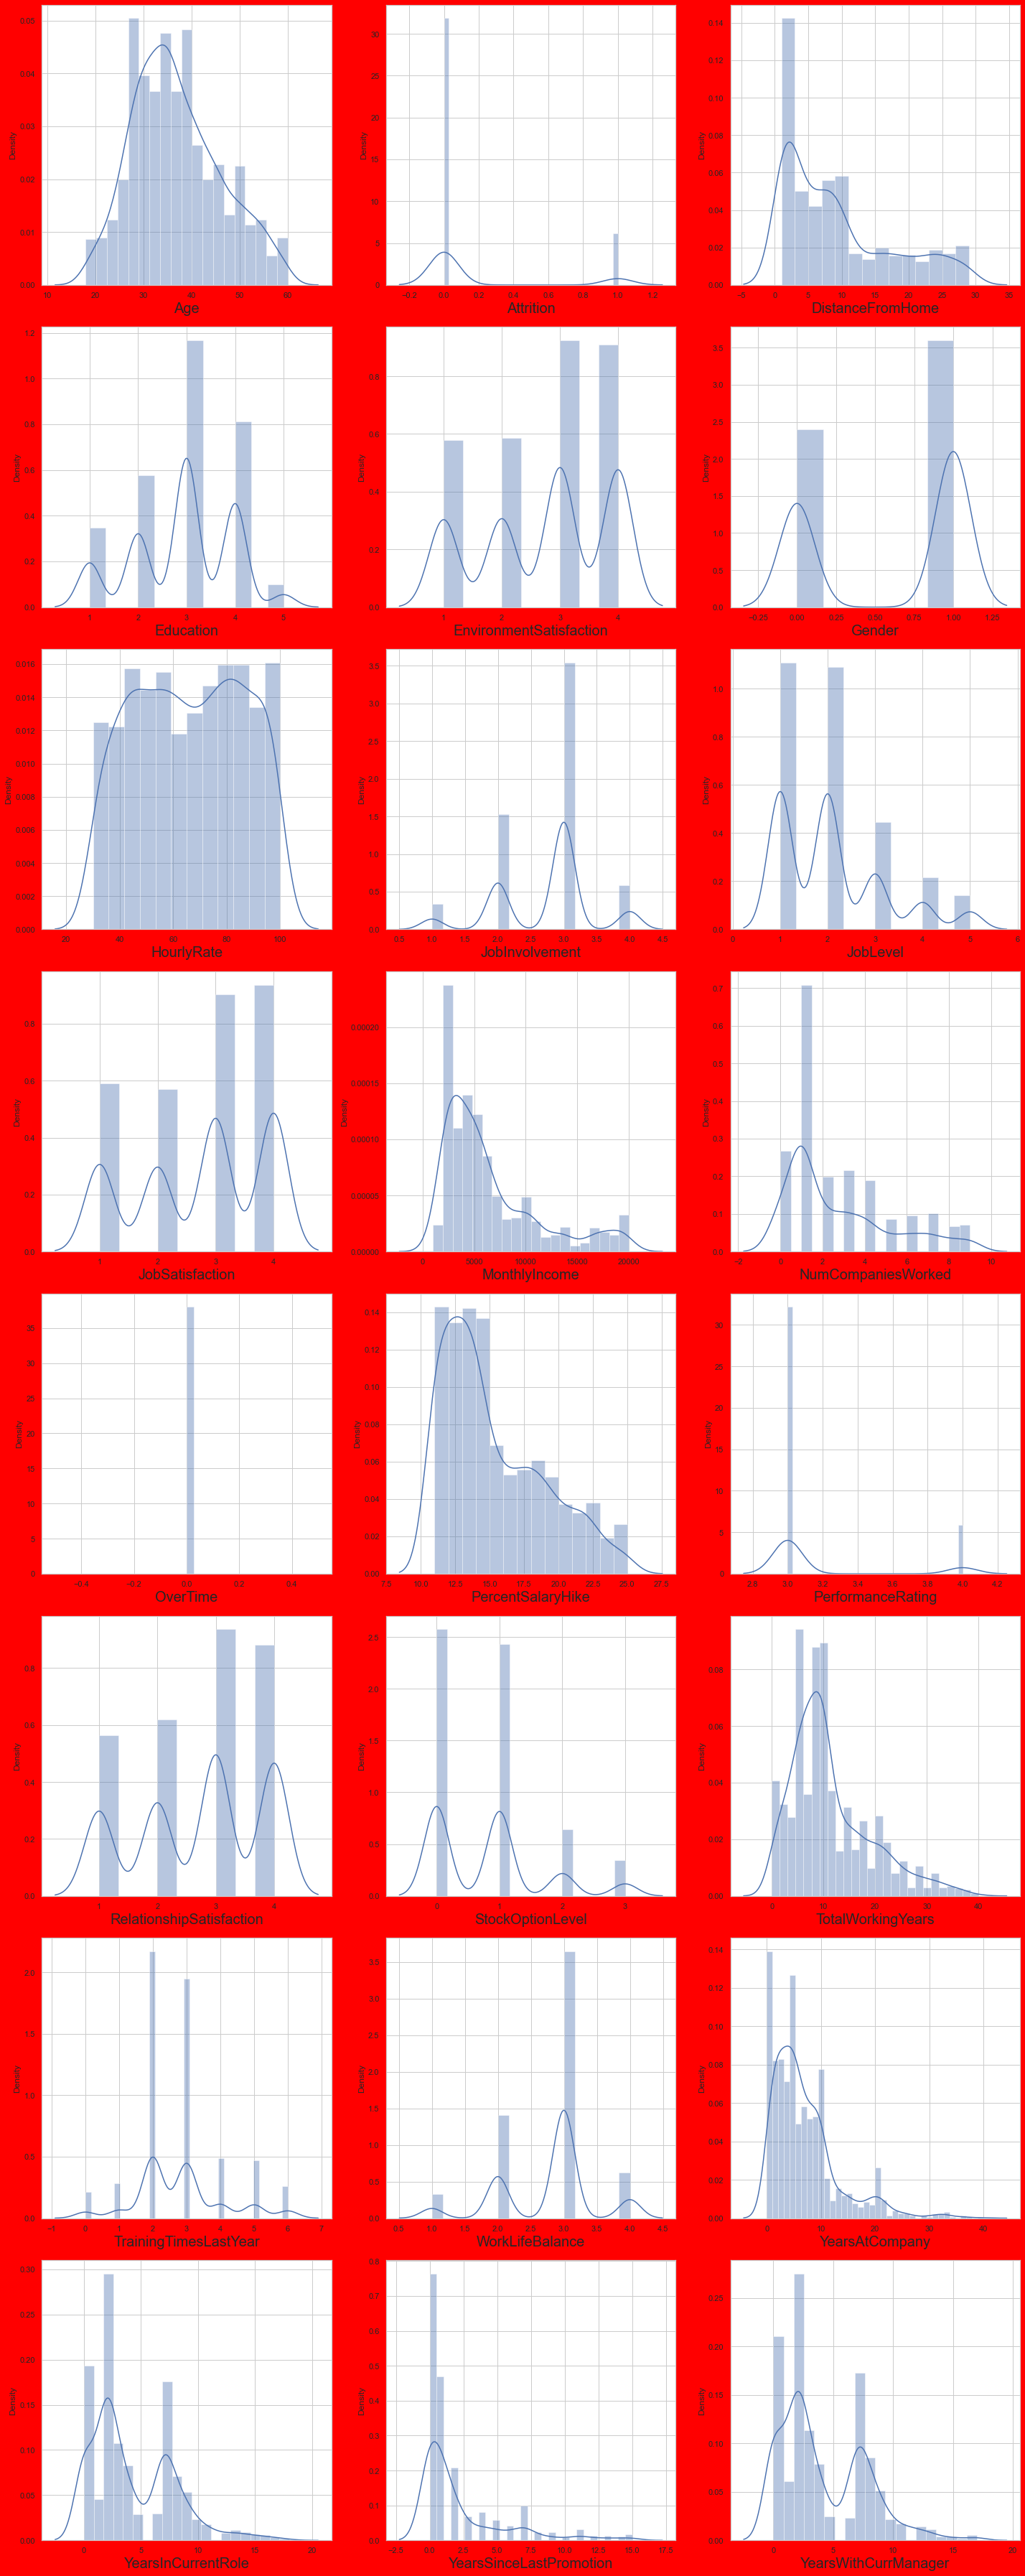

In [43]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [44]:
df_feature = data.drop('JobLevel', axis = 1)
data.shape

(1470, 24)

Visualize the Outliers Using Boxplot

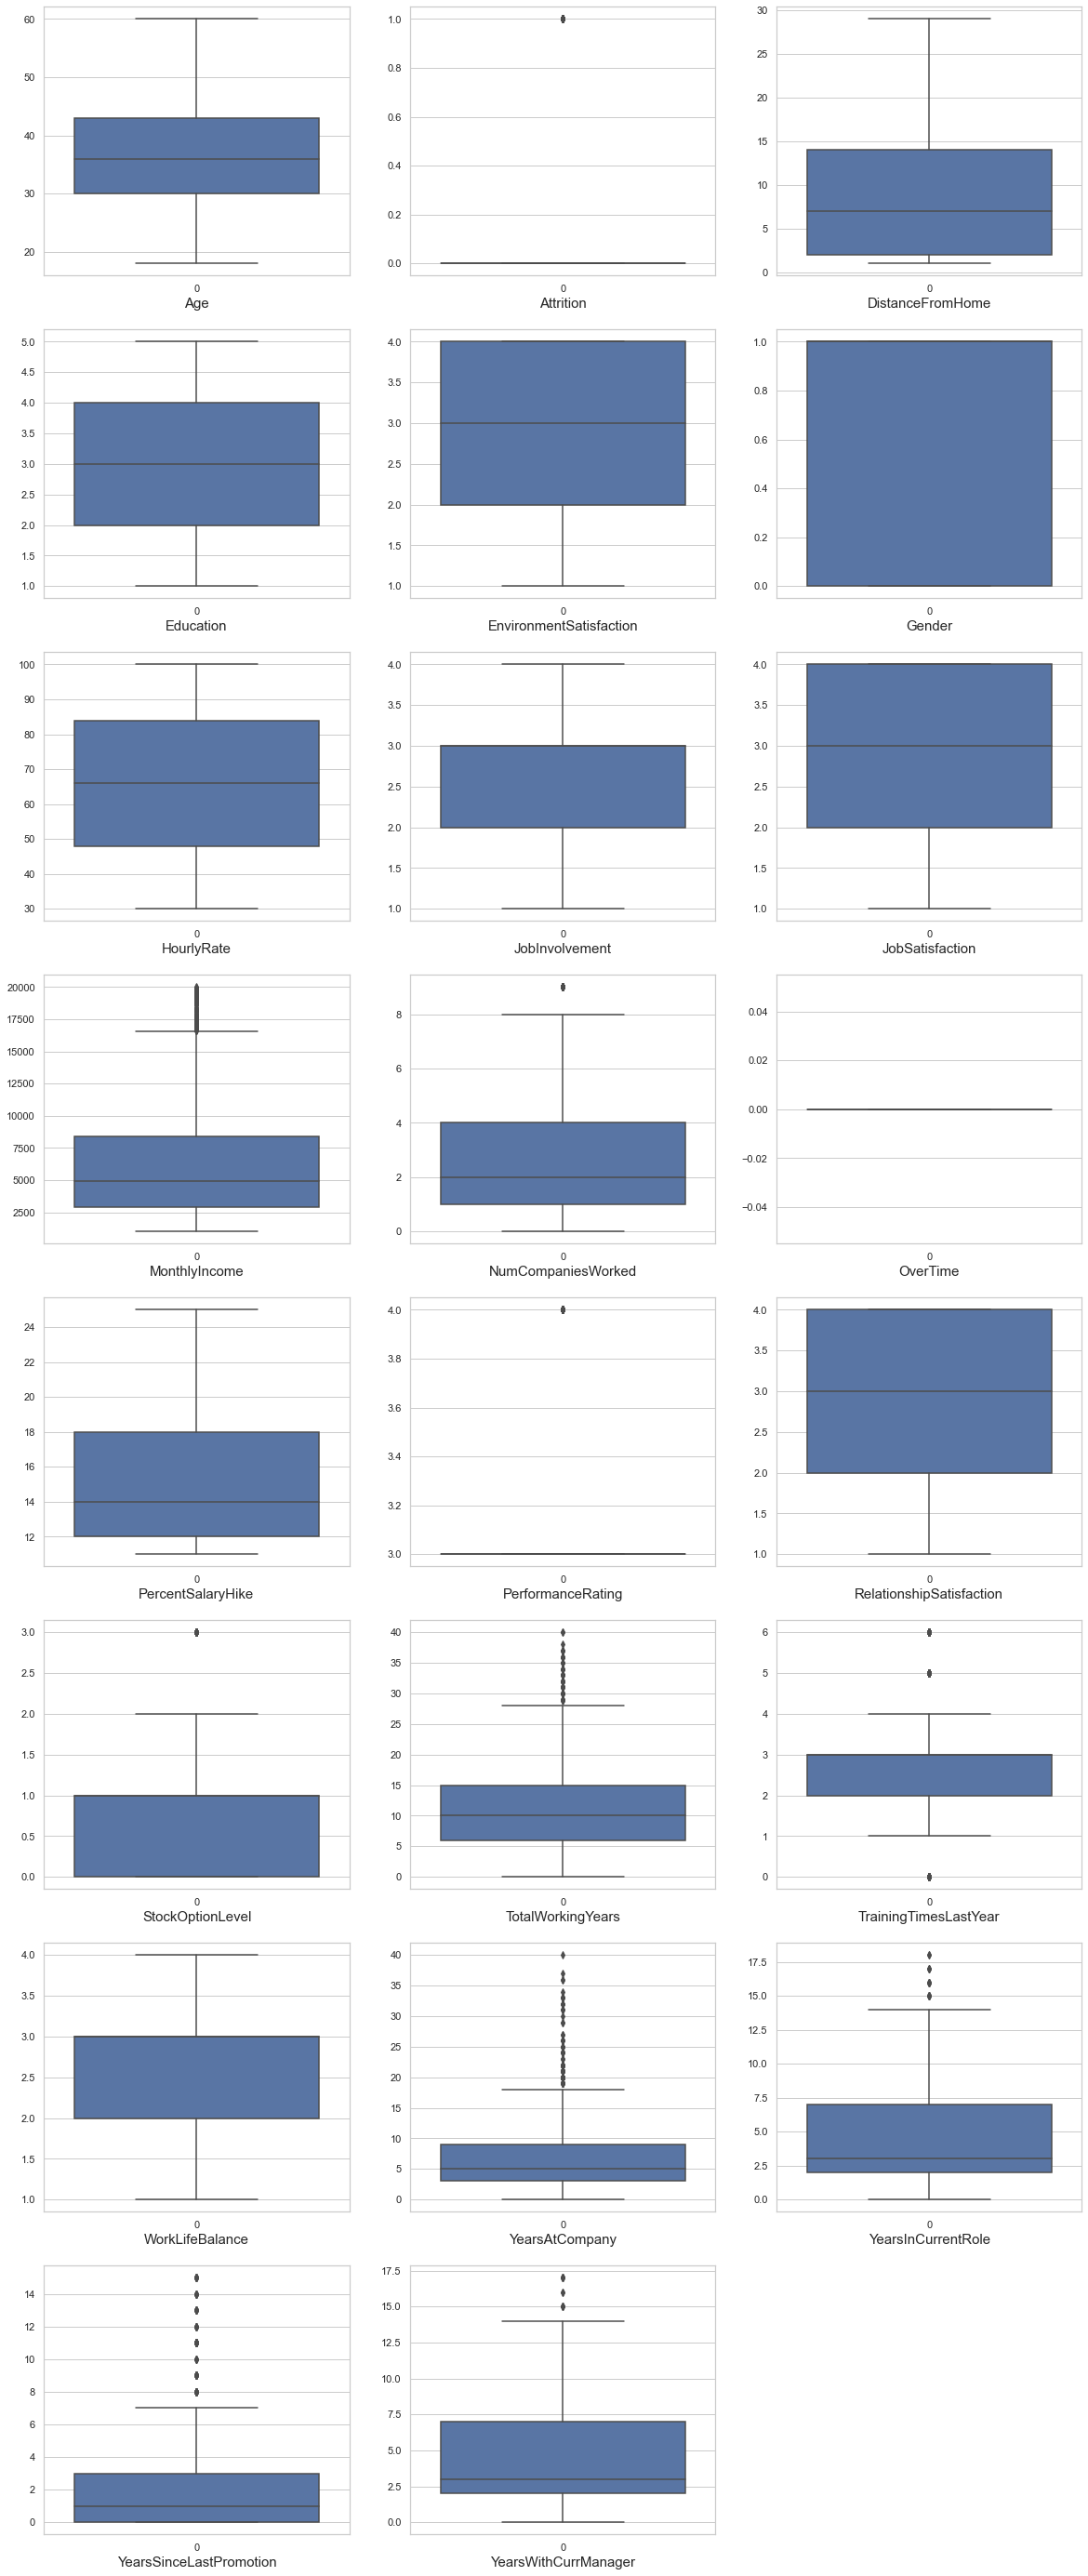

In [45]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,50))
graph = 1

for column in df_feature:
    if graph<=24:
        plt.subplot(8,3,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [46]:
data.shape

(1470, 24)

In [47]:
# find the IQR to identify outliers

#1st Quantile

Q1 = data.quantile(0.25)

# 3rd Quantile

Q3 = data.quantile(0.78)

#IQR ( Inter Quantile Range)

IQR = Q3-Q1

In [48]:
#validating one outlier
preg_high = (Q3.YearsAtCompany + (1.5*IQR.YearsAtCompany))
preg_high

20.5

In [49]:
# Check the indexes whcih have higher values
index = np.where(data['YearsAtCompany']>preg_high)
index

(array([  18,   28,   45,   62,   63,   90,   98,  119,  126,  178,  187,
         190,  231,  237,  244,  257,  270,  300,  311,  314,  326,  390,
         400,  411,  425,  473,  477,  535,  538,  544,  561,  584,  592,
         595,  653,  677,  738,  746,  749,  753,  799,  838,  861,  907,
         913,  914,  918,  922,  926,  962, 1086, 1096, 1111, 1116, 1135,
        1138, 1140, 1221, 1223, 1225, 1242, 1295, 1303, 1331, 1351, 1443],
       dtype=int64),)

In [50]:
data= data.drop(data.index[index])
data.shape

(1404, 24)

In [51]:
data.reset_index()

,index,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,2,0,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,8,1,3,1,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,2,4,1,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,3,4,4,0,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,1,1,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,1465,36,0,23,2,3,1,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1400,1466,39,0,6,1,4,1,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1401,1467,27,0,4,3,2,1,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1402,1468,49,0,2,3,4,1,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [52]:
#validating one outlier
preg_high = (Q3.TotalWorkingYears + (1.5*IQR.TotalWorkingYears))
preg_high

31.0

In [53]:
# Check the indexes whcih have higher values
index = np.where(data['TotalWorkingYears']>preg_high)
index

(array([  80,  220,  378,  400,  420,  507,  590,  615,  678,  824,  847,
         851,  907,  926,  959,  993, 1127, 1203, 1239, 1336], dtype=int64),)

In [54]:
data= data.drop(data.index[index])
data.shape

(1384, 24)

In [55]:
data.reset_index()

,index,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,2,0,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,8,1,3,1,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,2,4,1,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,3,4,4,0,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,1,1,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1465,36,0,23,2,3,1,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1380,1466,39,0,6,1,4,1,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1381,1467,27,0,4,3,2,1,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1382,1468,49,0,2,3,4,1,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [56]:
preg_high = (Q3.YearsInCurrentRole + (1.5*IQR.YearsInCurrentRole))
preg_high

14.5

In [57]:
# Check the indexes whcih have higher values
index = np.where(data['YearsInCurrentRole']>preg_high)
index

(array([ 114,  262,  390,  436,  671,  959, 1077, 1083, 1245, 1345],
       dtype=int64),)

In [58]:
data= data.drop(data.index[index])
data.shape

(1374, 24)

In [59]:
data.reset_index()

,index,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,2,0,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,8,1,3,1,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,2,4,1,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,3,4,4,0,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,1,1,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1465,36,0,23,2,3,1,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1370,1466,39,0,6,1,4,1,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1371,1467,27,0,4,3,2,1,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1372,1468,49,0,2,3,4,1,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [60]:
#validating one outlier
preg_high = (Q3.MonthlyIncome + (1.5*IQR.MonthlyIncome))
preg_high

19035.35

In [61]:
# Check the indexes whcih have higher values
index = np.where(data['MonthlyIncome']>preg_high)
index

(array([  24,  154,  259,  366,  461,  527,  712,  716,  759,  795,  811,
         838,  889, 1050, 1053, 1074, 1190, 1239, 1284, 1342], dtype=int64),)

In [62]:
data= data.drop(data.index[index])
data.shape

(1354, 24)

In [63]:
data.reset_index()

,index,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,2,0,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,8,1,3,1,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,2,4,1,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,3,4,4,0,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,1,1,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1465,36,0,23,2,3,1,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1350,1466,39,0,6,1,4,1,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1351,1467,27,0,4,3,2,1,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1352,1468,49,0,2,3,4,1,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [64]:
#validating one outlier
preg_high = (Q3.YearsSinceLastPromotion + (1.5*IQR.YearsSinceLastPromotion))
preg_high

7.5

In [65]:
# Check the indexes whcih have higher values
index = np.where(data['YearsSinceLastPromotion']>preg_high)
index

(array([  15,   42,   51,   57,   58,   81,   85,  101,  172,  178,  194,
         202,  231,  248,  249,  287,  292,  298,  306,  356,  358,  368,
         391,  406,  461,  462,  467,  473,  485,  636,  641,  647,  673,
         691,  693,  723,  750,  805,  806,  859,  872,  873,  879,  883,
         896,  926,  946,  973,  993,  999, 1007, 1114, 1118, 1120, 1238,
        1277, 1290, 1296, 1301, 1312, 1328, 1331, 1346], dtype=int64),)

In [66]:
data= data.drop(data.index[index])
data.shape

(1291, 24)

In [67]:
data.reset_index()

,index,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,2,0,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,8,1,3,1,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,2,4,1,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,3,4,4,0,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,1,1,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1465,36,0,23,2,3,1,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1287,1466,39,0,6,1,4,1,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1288,1467,27,0,4,3,2,1,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1289,1468,49,0,2,3,4,1,63,2,2,...,3,4,0,17,3,2,9,6,0,8


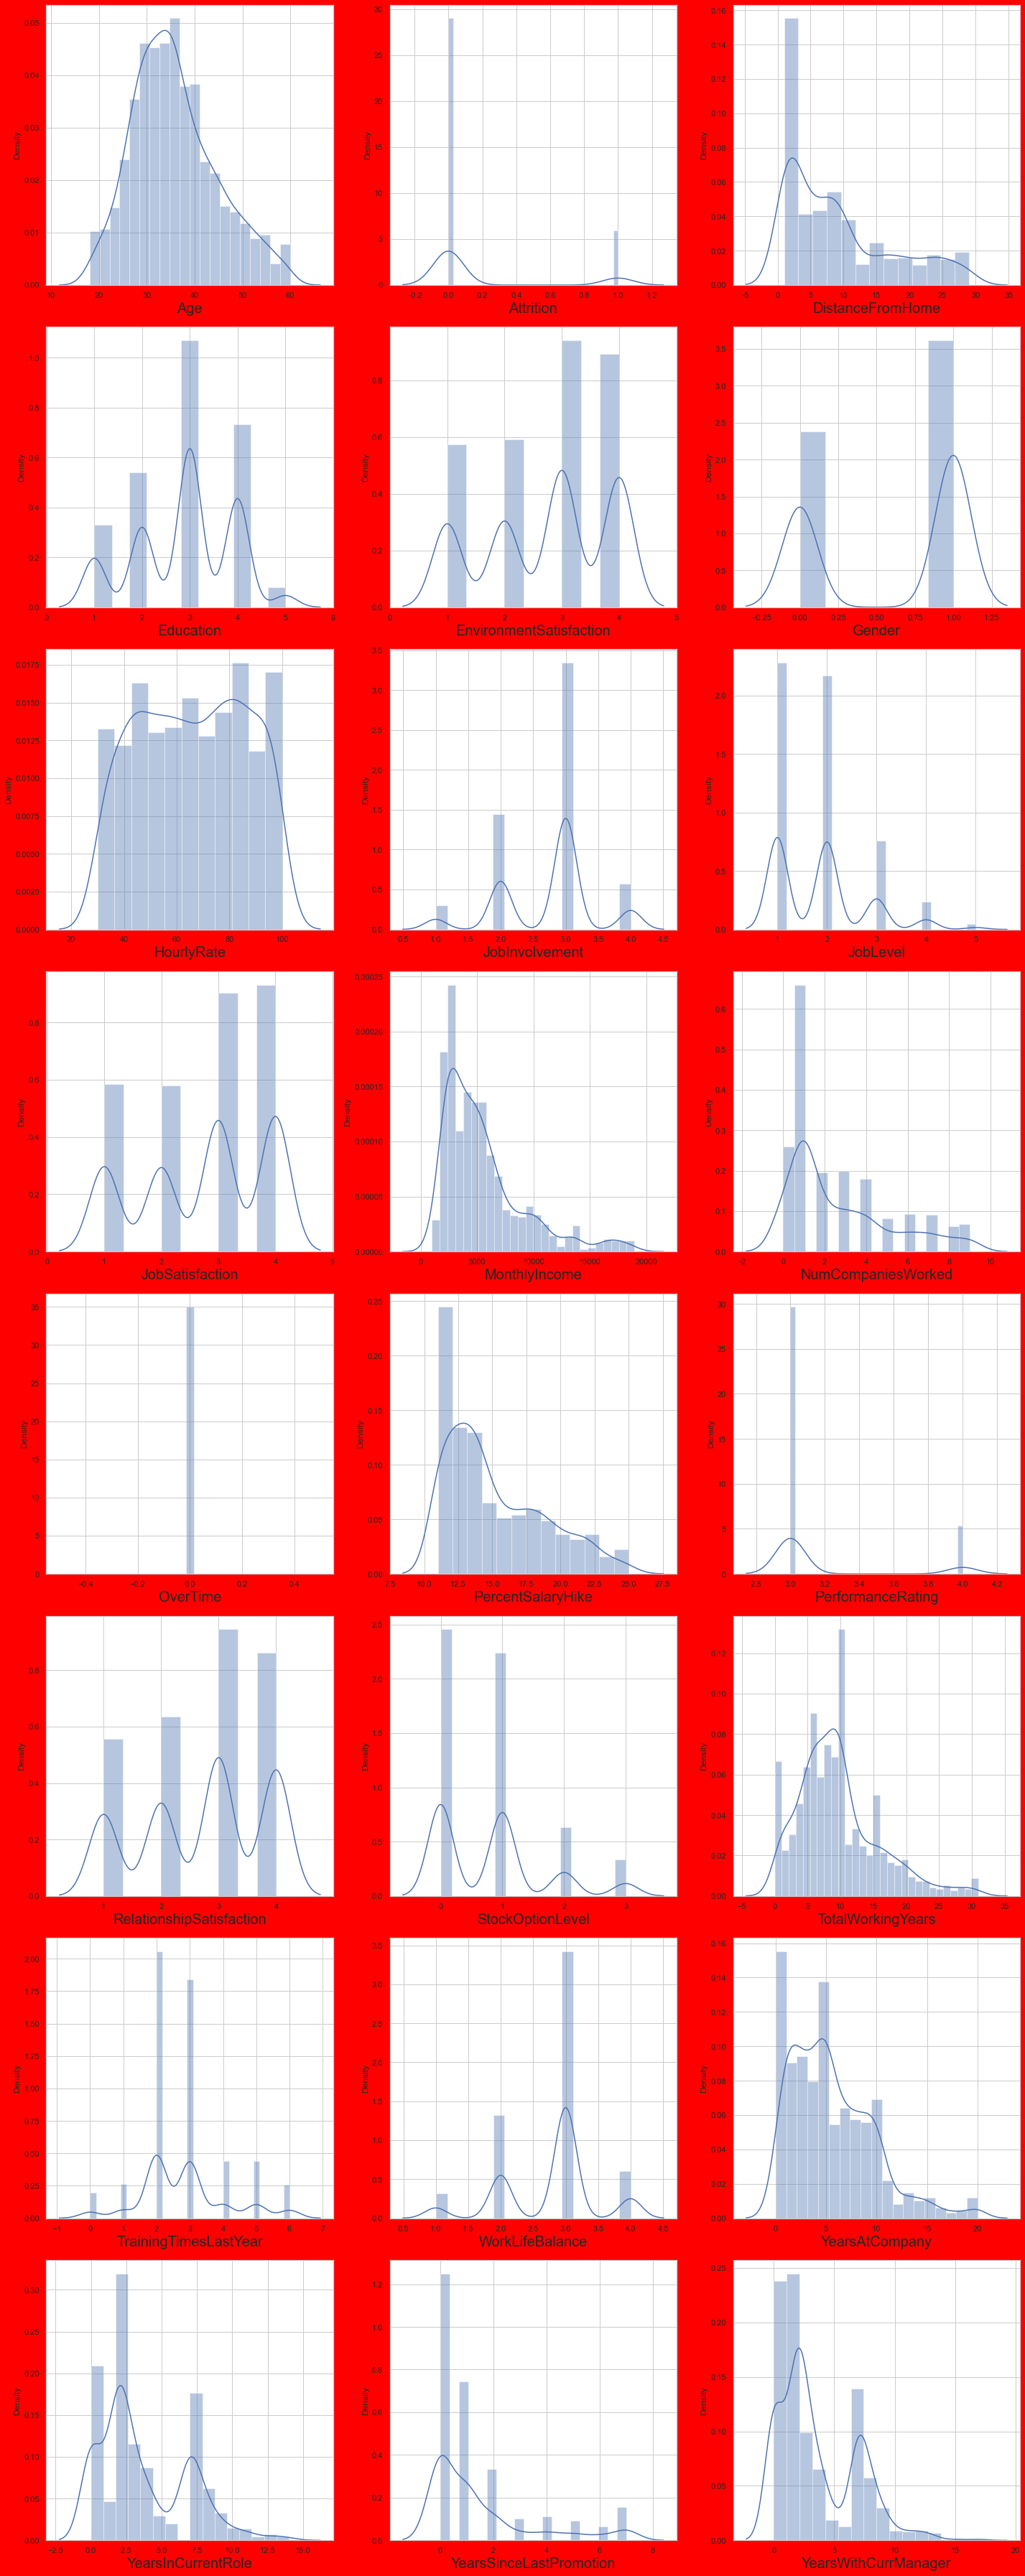

In [68]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

Visualize the Outliers After removing Some Outliers

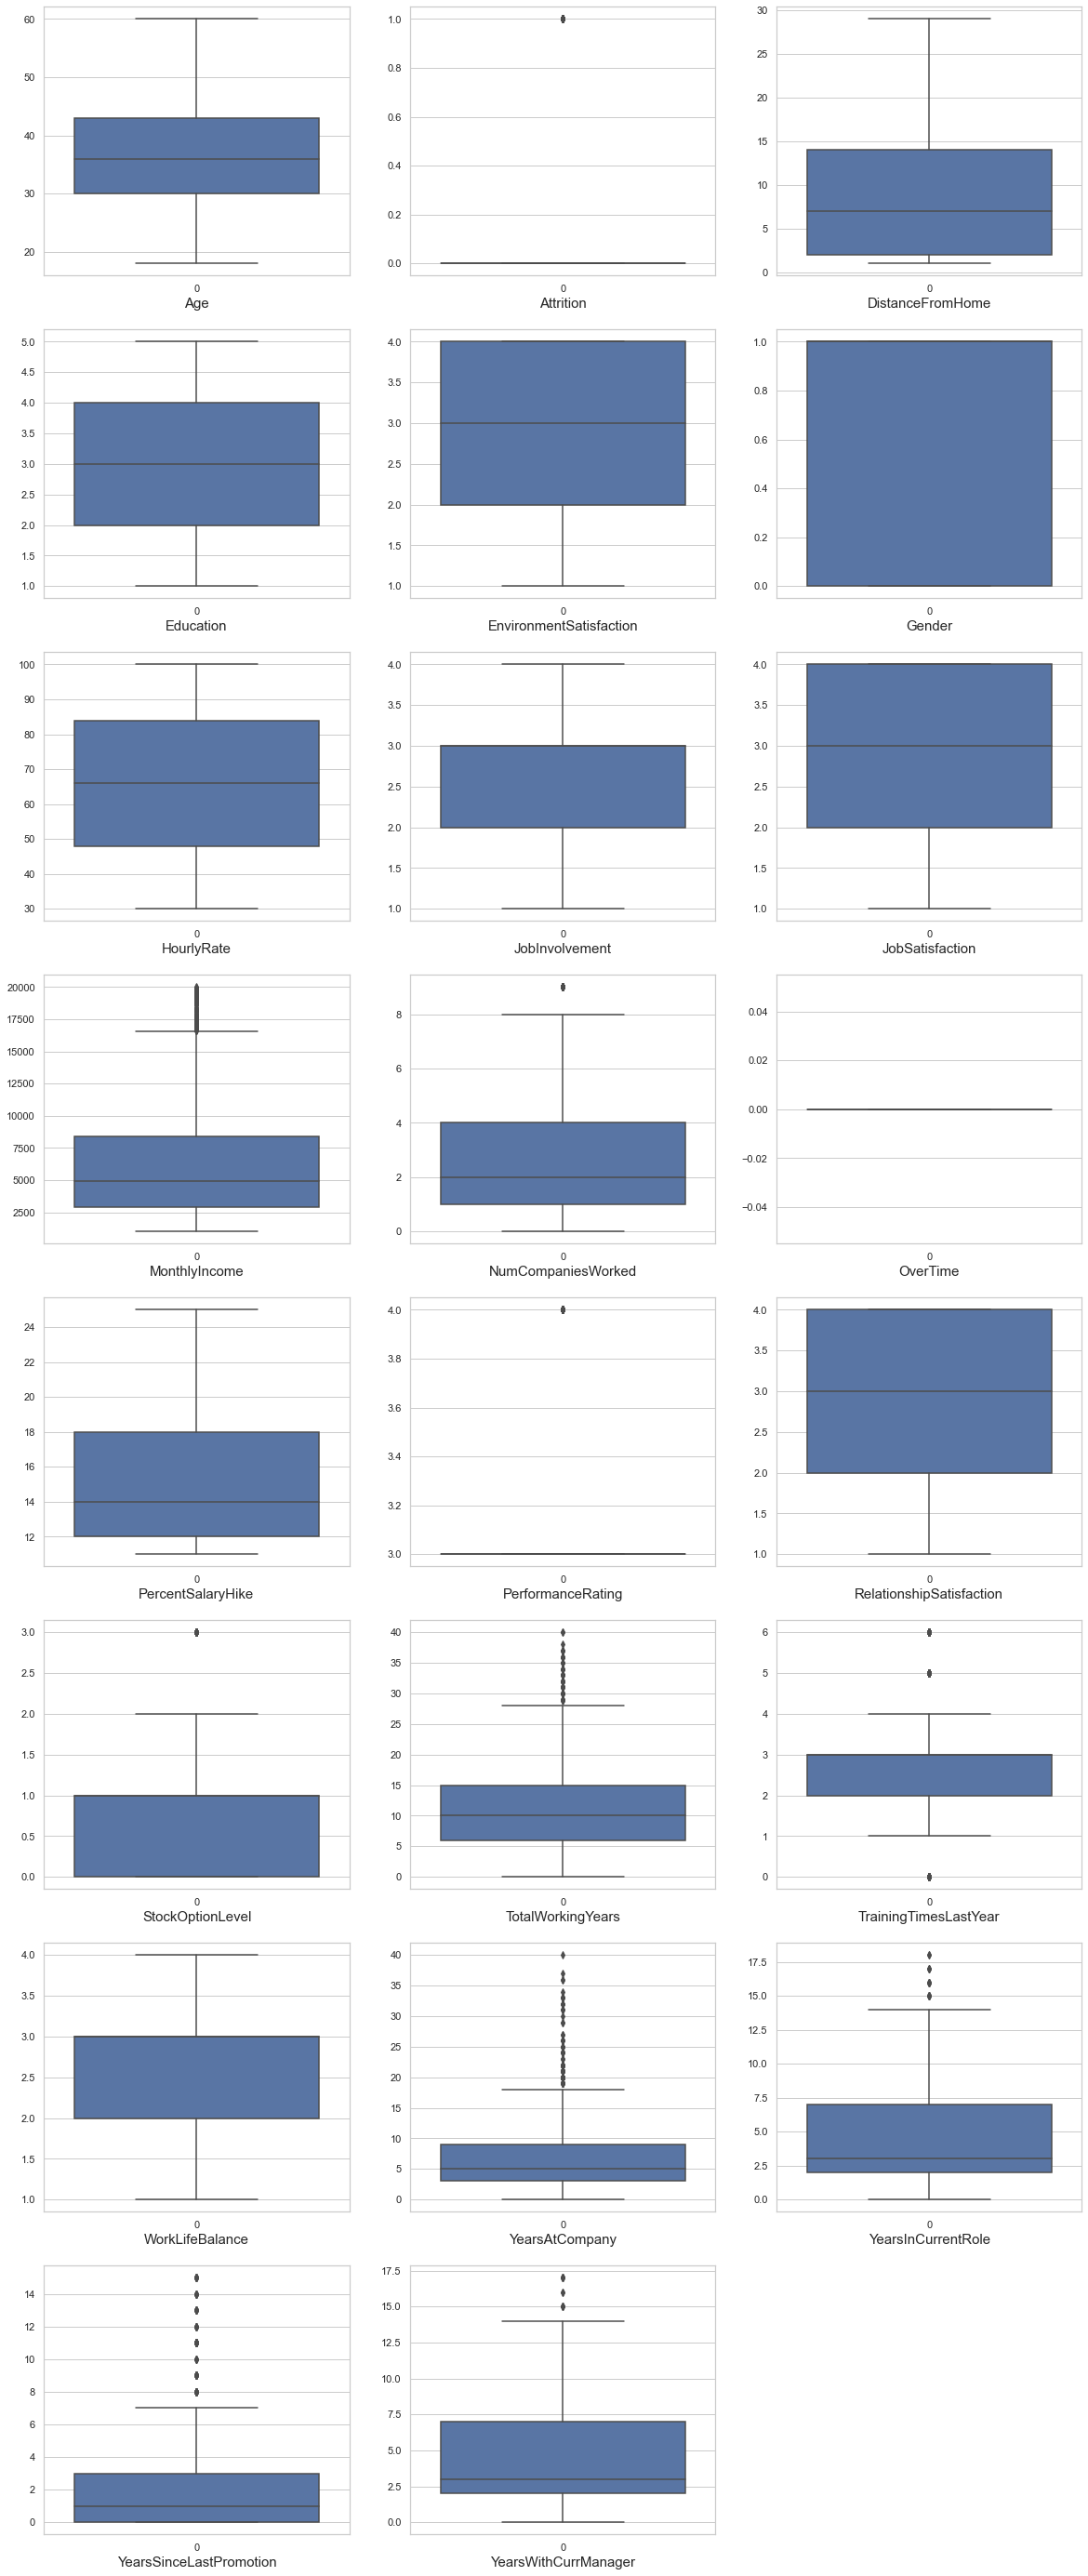

In [69]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,50))
graph = 1

for column in df_feature:
    if graph<=24:
        plt.subplot(8,3,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Data Standarization and Normalization

In [70]:
#Finding relationship we want to keep only those feature which have relationship with labels
X = data.drop(columns = ["Attrition"])
y = data["Attrition"]

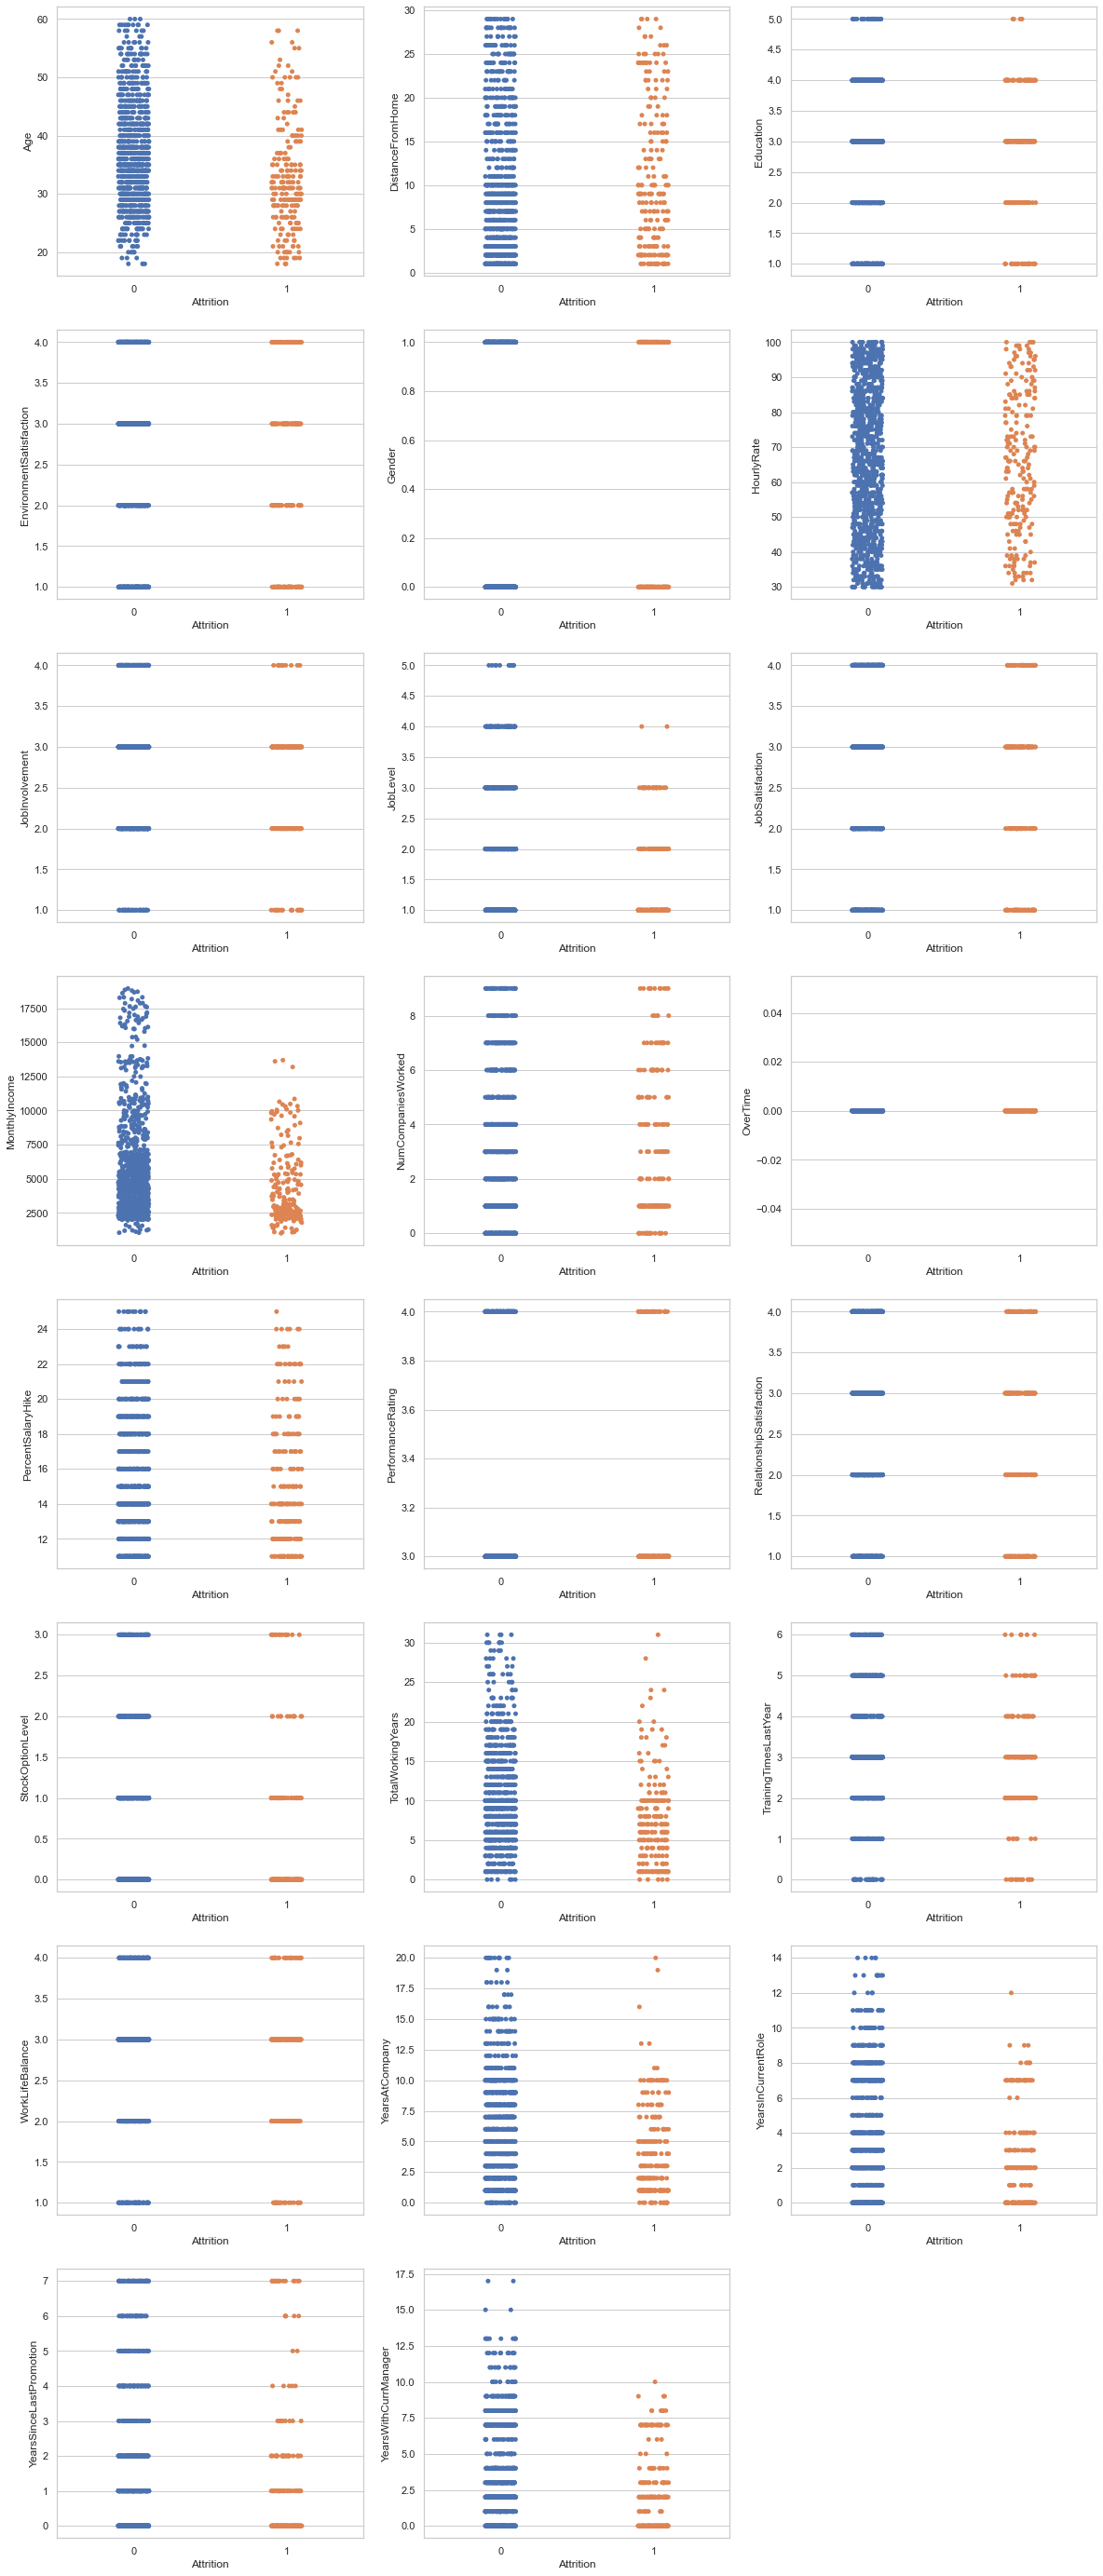

In [71]:
plt.figure(figsize =(20,50))
graph = 1

for column in X:
    if graph<=24:
        ax =plt.subplot(8,3,graph)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [72]:
# Check multicollinearity problem Find if one feature is dependent on another feature
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.25, random_state = 355)

In [74]:
def metric_score (clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n =================Train Result=====================")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print("\n==================Test Result=======================")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n Test Classification Report\n",classification_report(y_test,pred,digits=2))

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Model Confidence / Accuracy
#Initiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [77]:
# Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
#Call The Function
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test, train = False)



 =================Train Result=====================
Accuracy Score : 85.64%

==================Test Result=======================
Accuracy Score : 85.76%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       276
           1       0.53      0.17      0.26        47

    accuracy                           0.86       323
   macro avg       0.70      0.57      0.59       323
weighted avg       0.82      0.86      0.82       323



In [79]:
from sklearn.model_selection import KFold, cross_val_score

In [80]:
k_f = KFold(n_splits = 3)

In [81]:
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [82]:
#for train, test in k_f.split([1,2,3,4,5,6,7,8,9]):
  #  print("Train : ",train,'Test : ',test)

In [83]:
#Cross Validation Score to check if the model is overfitting 
cross_val_score(knn, X_scalar,y,cv = 5)
cross_val_score(knn,X_scalar,y,cv = 5).mean()

0.8334650264882824

##### using GridSearchCV for the bet parameter to improve the accuracy

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' : [3,5,7,9,11,13]
             }

In [86]:
gridsearch = GridSearchCV(estimator = knn,param_grid = param_grid)

In [87]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [88]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [89]:
# We will use the parameters in our K-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree',leaf_size =3,n_neighbors = 7)


In [90]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [91]:
# call the function and pass dataset to check train and test score
# This is for Training Score
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(knn,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 84.19%

==================Test Result=======================
Accuracy Score : 86.69%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       276
           1       0.70      0.15      0.25        47

    accuracy                           0.87       323
   macro avg       0.79      0.57      0.59       323
weighted avg       0.85      0.87      0.83       323



In [92]:
# If we want to check the confustion_matrix we can check
y_pred = knn.predict(x_test)
cfm = confusion_matrix (y_test,y_pred)
cfm

array([[273,   3],
       [ 40,   7]], dtype=int64)

In [93]:
X_scalar.shape[0]

1291

In [94]:
#Finding Variance inflation factor in each scaled columns
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scalar,i) for i in range (X_scalar.shape[1])]
vif["features"]=X.columns
vif

,vif,features
0,1.764172,Age
1,1.019450,DistanceFromHome
2,1.065841,Education
3,1.016516,EnvironmentSatisfaction
4,1.018870,Gender
5,1.018773,HourlyRate
6,1.011629,JobInvolvement
7,7.060158,JobLevel
8,1.014187,JobSatisfaction
9,6.774617,MonthlyIncome


Creation of Train and Test Dataset Using Optimum Parameters

In [95]:
#Now Split our data in test and training set
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.25, random_state = 355)

In [96]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [97]:
#Let's see how well our model perform on the test data set
x_test

array([[-1.00584184, -0.40359895,  1.08825672, ..., -0.21231069,
        -0.72844172, -0.1877948 ],
       [-0.43690484,  2.08112323,  1.08825672, ..., -0.53363907,
         0.28276071, -0.50102876],
       [-0.43690484, -1.02477949,  0.10988665, ...,  1.39433118,
         2.81076677,  1.37837501],
       ...,
       [ 2.40778019,  1.83265101, -0.86848343, ..., -0.21231069,
        -0.2228405 ,  0.12543916],
       [-1.46099145, -0.65207116, -1.8468535 , ..., -0.53363907,
        -0.2228405 , -0.50102876],
       [-0.66447964,  0.09334549,  0.10988665, ..., -0.21231069,
        -0.2228405 ,  0.12543916]])

In [98]:
y_pred = log_reg.predict(x_test)

In [99]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8699690402476781

In [101]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   4],
       [ 38,   9]], dtype=int64)

In [102]:
# Now Calculate recall, Precision, F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       276
           1       0.69      0.19      0.30        47

    accuracy                           0.87       323
   macro avg       0.78      0.59      0.61       323
weighted avg       0.85      0.87      0.84       323



In [103]:
# ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
# Threshold [0] means no innstances predicted, it should be read from 0 to max
print('Threshold = ',thresholds)
print('True Positive Rate = ', tpr)
print("False Positive Rate = ", fpr)

Threshold =  [2 1 0]
True Positive Rate =  [0.         0.19148936 1.        ]
False Positive Rate =  [0.         0.01449275 1.        ]


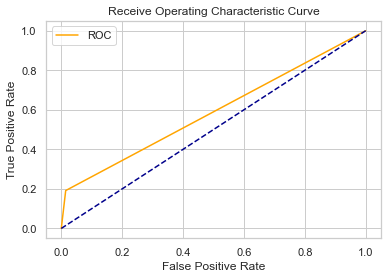

In [104]:
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristic Curve')
plt.legend()
plt.show()

In [105]:
# How much area it is covering (AUC) 
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.5884983040394696


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [108]:
# Let's check how well models fit on train data
# Adjust r2 Score
regression.score(x_train,y_train)

0.1440955430585874

In [109]:
# Let's check how well models fit the last data 
regression.score(x_test,y_test)

0.12814301542250617

Let's Plot and Visualize

In [110]:
y_pred = regression.predict(x_test)
y_pred

array([ 0.16200385,  0.28956778,  0.17527277,  0.13043447,  0.21155158,
        0.02750566,  0.33583809,  0.01704262,  0.18593838, -0.02123809,
        0.18581265,  0.13955543, -0.00478089,  0.06497187,  0.29330007,
        0.14689196,  0.19860031,  0.08715889,  0.10133584,  0.19108108,
        0.18115391,  0.24894575,  0.03312191,  0.09267083,  0.15681727,
        0.09546643,  0.26821139,  0.53792933,  0.08095956,  0.22934289,
        0.3208876 ,  0.33180841,  0.28364583,  0.0966515 ,  0.24004248,
       -0.152582  ,  0.1862858 ,  0.36939947,  0.32754299, -0.08681191,
        0.04690921,  0.35615256,  0.09098437,  0.12723986,  0.11259282,
        0.3117117 ,  0.18231312,  0.02932231,  0.29904733, -0.05631274,
        0.05108647,  0.26918629,  0.05776711,  0.12273298,  0.1795596 ,
        0.23548302,  0.08177246,  0.2677419 ,  0.31900007,  0.18330648,
        0.07067385,  0.16392566, -0.17437439,  0.09448815,  0.07537862,
        0.11002763,  0.05102641,  0.24479618,  0.24238089,  0.25

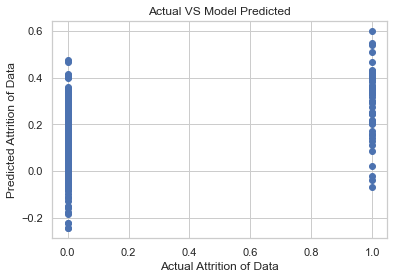

In [111]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Attrition of Data')
plt.ylabel('Predicted Attrition of Data')
plt.title("Actual VS Model Predicted")
plt.show()

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)

In [113]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test,y_pred)

0.24219947710617765

In [114]:
# MSE (Mean Squared Error)
mean_squared_error(y_test,y_pred)

0.10840445900889732

In [115]:
# RMSE (Root Mean Squared Error)
np.sqrt(mean_squared_error(y_test,y_pred))

0.32924832423096295

In [116]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV


In [117]:
#LassoCV will return best alpha after max iteration 
#Normalize is subtracting the mean and dividing by the L2_norm

lassocv = LassoCV(alphas = None, max_iter =100,normalize= True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [118]:
# Best Alpha Parameter
alpha = lassocv.alpha_
alpha

0.00010144415534865308

In [119]:
# Now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010144415534865308)

In [120]:
lasso_reg.score(x_test,y_test)

0.12837068049574174

In [121]:
# Ridge will return best alpha and coefficient after performing 10 cross validation

ridgecv= RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [122]:
ridgecv.alpha_

0.09099999999999998

In [123]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [124]:
ridge_model.score(x_test,y_test)

0.1281518149166161